# <center>Ensemble
<center>Machine Learning lab 11
<center>Miłosz Segedyn

## Single Classifier vs Bagging vs Boosting comparison

In [1]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

wine = load_wine()
scores = []

In [2]:
treeClf = DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
scores.append(cross_val_score(treeClf, wine.data, wine.target))

In [3]:
bagClf = BaggingClassifier(base_estimator=treeClf, n_estimators=50, random_state=1)
scores.append(cross_val_score(bagClf, wine.data, wine.target))

In [4]:
adaClf = AdaBoostClassifier(base_estimator=treeClf, n_estimators=50, algorithm='SAMME', random_state=1)
scores.append(cross_val_score(adaClf, wine.data, wine.target))

In [5]:
gradClf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, subsample=0.5, max_depth=1, random_state=1)
scores.append(cross_val_score(gradClf, wine.data, wine.target))

In [6]:
for i, name in enumerate(["Decision tree", "Bagging", "AdaBoost", "Gradient boosting"]):
    print(name + " score:")
    print(scores[i])
    print("average(" + str(np.average(scores[i])) + ')')


Decision tree score:
[0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]
average(0.8882539682539681)
Bagging score:
[0.91666667 0.91666667 0.94444444 0.97142857 1.        ]
average(0.9498412698412698)
AdaBoost score:
[0.94444444 0.94444444 0.97222222 0.97142857 0.97142857]
average(0.9607936507936508)
Gradient boosting score:
[0.88888889 0.91666667 1.         0.97142857 1.        ]
average(0.9553968253968254)


## Gradient boosting analysis

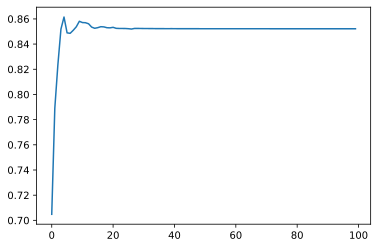

In [7]:
gradClf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, subsample=0.5, max_depth=1, random_state=1).fit(wine.data, wine.target)
test = np.cumsum(gradClf.oob_improvement_)
plot = plt.plot(test)
